<style>div.container { width: 100% }</style>
<img style="float:left;  vertical-align:text-bottom;" height="65" width="172" src="assets/PyViz_logo_wm_line.png" />
<div style="float:right; vertical-align:text-bottom;"><h2>Tutorial 10. Working with large datasets</h2></div>

HoloViews supports even high-dimensional datasets easily, and the standard mechanisms discussed already work well as long as you select a small enough subset of the data to display at any one time.  However, some datasets are just inherently large, even for a single frame of data, and cannot safely be transferred for display in any standard web browser. Luckily, HoloViews makes it simple for you to use the separate [Datashader](http://datashader.readthedocs.io) library together with any of the plotting extension libraries, including Bokeh and Matplotlib. Datashader is designed to complement standard plotting libraries by providing faithful visualizations for very large datasets, focusing on revealing the overall distribution, not just individual data points.

Datashader uses computations accelerated using [Numba](http://numba.pydata.org), making it fast to work with datasets of millions or billions of datapoints stored in [Dask](http://dask.pydata.org/en/latest/) dataframes.  Dask dataframes provide an API that is functionally equivalent to Pandas, but allows working with data out of core and scaling out to many processors across compute clusters. Here we will use Dask to load a large Parquet-format file of taxi coordinates.

<div style="margin: 10px">
<a href="http://holoviews.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:150px" src="./assets/holoviews.png"/></a>
<a href="http://geoviews.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:150px" src="./assets/geoviews.png"/></a>
<a href="http://bokeh.pydata.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:150px" src="./assets/bokeh.png"/></a>
<a href="http://datashader.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:150px" src="./assets/datashader.png"/></a><br><br>
<a href="http://pandas.pydata.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:140px" src="./assets/pandas.png"/></a>
<a href="http://numba.pydata.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:150px" src="./assets/numba.png"/></a>
<a href="http://dask.pydata.org"><img style="margin:8px; display:inline; object-fit:scale-down; max-height:140px" src="./assets/dask.png"/></a>
</div>

### How does datashader work?

<img src="./assets/datashader_pipeline.png" width="80%"/>

* Tools like Bokeh map **Data** (left) directly into an HTML/JavaScript **Plot** (right)
* datashader instead renders **Data** into a plot-sized **Aggregate** array, from which an **Image** can be constructed then embedded into a Bokeh **Plot**
* Only the fixed-sized **Image** needs to be sent to the browser, allowing millions or billions of datapoints to be used
* Every step automatically adjusts to the data, but can be customized

#### When not to use datashader

* Plotting less than 1e5 or 1e6 data points
* When every datapoint must be resolveable individually; standard Bokeh will render all of them
* For full interactivity (hover tools) with every datapoint

#### When to use datashader

* Actual big data; when Bokeh/Matplotlib have trouble
* When the distribution matters more than individual points
* When you find yourself sampling, decimating, or binning to better understand the distribution

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
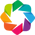

In [1]:
import holoviews as hv
import dask.dataframe as dd
import datashader as ds
import geoviews as gv

from holoviews.operation.datashader import datashade, rasterize
hv.extension('bokeh')

## Load the data

As a first step we will load a large dataset using Dask. If you have followed the setup instructions you will have downloaded a large Parquet-format file containing 12 million taxi trips.  Let's load this data using dask to create a dataframe ``ddf``:

<div class="alert alert-warning" role="alert">
  If you are low on memory (less than 8 GB) or have not downloaded the full data, you can load only a subset of the data by changing 'nyc_taxi_wide.parq' to 'nyc_taxi_50k.parq'.</code>
</div>

In [4]:
ddf = dd.read_parquet('../data/nyc_taxi_wide.parq').persist()
#ddf = dd.read_parquet('../data/nyc_taxi_50k.parq').persist()



print('%s Rows' % len(ddf))
print('Columns:', list(ddf.columns))

11842094 Rows
Columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y', 'fare_amount', 'tip_amount', 'dropoff_hour', 'pickup_hour']


## Create a dataset

In previous sections we have already seen how to declare a set of [``Points``](http://holoviews.org/reference/elements/bokeh/Points.html) from a pandas dataframe. Here we do the same for a Dask dataframe passed in with the desired key dimensions:

In [5]:
points = hv.Points(ddf, kdims=['dropoff_x', 'dropoff_y'])

We could now simply type ``points``, and Bokeh would attempt to display this data as a standard Bokeh plot. Before doing that, however, remember that we have 12 million rows of data, and no current plotting program will handle that well in a web browser! Instead of letting Bokeh see this data, let's convert it to something far more tractable using the ``datashade`` operation. This operation will aggregate the data on a 2D grid, apply shading to assign pixel colors to each bin in this grid, and build an ``RGB`` Element (just a fixed-sized image) we can safely display in a browser:

In [6]:
%opts RGB [width=600 height=500 bgcolor="green"]
datashade(points)

:DynamicMap   []
   :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

If you zoom in you will note that the plot rerenders depending on the zoom level, which allows the full dataset to be explored interactively even though only an image of it is ever sent to the browser.  The way this works is that ``datashade`` is a dynamic operation that also declares some linked streams. These linked streams are automatically instantiated and dynamically supply the ``plot_size``, ``x_range``, and ``y_range`` from the Bokeh plot to the operation based on your current viewport as you zoom or pan:

In [7]:
datashade.streams

[holoviews.streams.PlotSize, holoviews.streams.RangeXY]

In [8]:
# Exercise: Plot the taxi pickup locations ('pickup_x' and 'pickup_y' columns)
# Warning: Don't try to display hv.Points() directly; it's too big! Use datashade() or rasterize() for any display
# Optional: Change the cmap on the datashade operation to inferno

from datashader.colors import inferno


## Adding a tile source

Using the GeoViews (geographic) extension for HoloViews, we can display a map in the background. Just declare a Bokeh WMTSTileSource and pass it to the gv.WMTS Element, then we can overlay it:

In [9]:
%opts RGB [xaxis=None yaxis=None]
from bokeh.models import WMTSTileSource
url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
wmts = WMTSTileSource(url=url)
gv.WMTS(wmts) * datashade(points)

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

In [10]:
# Exercise: Overlay the taxi pickup data on top of the Wikipedia tile source

wiki_url = 'https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'


## Aggregating with a variable

So far we have simply been counting taxi dropoffs, but our dataset is much richer than that. We have information about a number of variables including the base cost of a taxi ride, the ``fare_amount``. Datashader provides a number of ``aggregator`` functions, which you can supply to the datashade operation. Here use the ``ds.mean`` aggregator to compute the average cost of a trip at a dropoff location:

In [11]:
selected = points.select(fare_amount=(None, 1000))
selected.data = selected.data.persist()
gv.WMTS(wmts) * datashade(selected, aggregator=ds.mean('fare_amount'))

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [dropoff_x,dropoff_y]   (R,G,B,A)

In [12]:
# Exercise: Use the ds.min or ds.max aggregator to visualize  ``tip_amount``  by dropoff location
# Optional: Eliminate outliers by using select


## Grouping by a variable

Because datashading happens only just before visualization, you can use any of the techniques shown in previous sections to select, filter, or group your data before visualizing it, such as grouping it by the hour of day:

In [13]:
%opts Image [width=600 height=500 logz=True xaxis=None yaxis=None tools=['hover'] colorbar=True]
taxi_ds = hv.Dataset(ddf)
grouped = taxi_ds.to(hv.Points, ['dropoff_x', 'dropoff_y'], groupby=['dropoff_hour'], dynamic=True)
rasterize(grouped).redim.values(dropoff_hour=range(24))

:DynamicMap   [dropoff_hour]
   :Image   [dropoff_x,dropoff_y]   (Count)

Here we're using `rasterize()`, which is the same as `datashade()` except that instead of using datashader to map the counts per pixel into a color for that pixel, it's letting Bokeh do that mapping, in your local browser. Although letting Bokeh do the colormapping means that we can't use datashader-specific features such as the default `eq_hist` histogram normalization, it does mean that we can use Bokeh's features like colorbars and hover support.  Here, if you hover over a given pixel, it will tell you the count of trips that fall into that pixel, along with the location in Web Mercator coordinates.

In [14]:
# Exercise: Facet the trips in the morning hours as an NdLayout using rasterize(grouped.layout())
# Hint: You can reuse the existing grouped variable or select a subset before using the .to method


As you can see, datashader requires taking some extra steps into consideration, but it makes it practical to work with even quite large datasets on an ordinary laptop.  On a 16GB machine, datasets 10X or 100X the one used here should be very practical, as illustrated at the [datashader web site](https://datashader.org).


# Onwards

* The [HoloViews Large Data](http://holoviews.org/user_guide/Large_Data.html) user guide explains in more detail how to work with large datasets using datashader.
* HoloViews also contains a [sample bokeh app](http://holoviews.org/gallery/apps/bokeh/nytaxi_hover.html) using this dataset and an additional linked stream that works well as a starting point.

Next, we go on to show how to create [live plots of dynamically updated data](./11_Streaming_Data.ipynb) (i.e. streaming data).